In [1]:
import os
import shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime

import plotly
from fbprophet import Prophet

In [2]:
df_sales = pd.read_csv('sales_train_v2.csv')

In [3]:
df_sales_fbprophet = df_sales.loc[(df_sales['item_cnt_day']>0)&
                                (df_sales['item_id']==969) &
                               (df_sales['date_block_num']<34)]

df_sales_fbprophet = df_sales_fbprophet.drop(['date','shop_id','item_id','item_price'],axis=1)
df_sales_fbprophet.groupby(['date_block_num'])['item_cnt_day'].sum().reset_index(name='item_cnt_month')

df_sales_fbprophet

,date_block_num,item_cnt_day
1706796,17,1.0
1706797,17,1.0
1706798,17,2.0
1707992,17,1.0
1707993,17,1.0
...,...,...
2864963,32,2.0
2872078,32,1.0
2885178,33,1.0
2905122,33,1.0


In [4]:
# date_block_num - a consecutive month number. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
df_sales_fbprophet['date_month'] = datetime.datetime(2013, 1, 1).date() + df_sales_fbprophet['date_block_num'].apply(pd.offsets.MonthBegin) 
df_sales_fbprophet = df_sales_fbprophet.groupby(['date_month'])['item_cnt_day'].sum().reset_index(name='item_cnt_month')
df_sales_fbprophet

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


,date_month,item_cnt_month
0,2014-06-01,128.0
1,2014-07-01,64.0
2,2014-08-01,35.0
3,2014-09-01,14.0
4,2014-10-01,8.0
5,2014-11-01,6.0
6,2014-12-01,7.0
7,2015-01-01,9.0
8,2015-02-01,7.0
9,2015-03-01,8.0


In [5]:
df_sales_fbprophet = df_sales_fbprophet.rename(columns={"date_month": "ds", "item_cnt_month": "y"})
df_sales_fbprophet

,ds,y
0,2014-06-01,128.0
1,2014-07-01,64.0
2,2014-08-01,35.0
3,2014-09-01,14.0
4,2014-10-01,8.0
5,2014-11-01,6.0
6,2014-12-01,7.0
7,2015-01-01,9.0
8,2015-02-01,7.0
9,2015-03-01,8.0


In [6]:
m = Prophet(daily_seasonality=False, yearly_seasonality=False)
m.fit(df_sales_fbprophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 12.


In [7]:
# predict 53 days into the future so we have a full month in January
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
72,2015-11-26
73,2015-11-27
74,2015-11-28
75,2015-11-29
76,2015-11-30


In [8]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
72,2015-11-26,-23.770797,-54.491578,6.905097
73,2015-11-27,-23.910184,-55.318610,4.672203
74,2015-11-28,-24.049572,-56.470951,3.202491
75,2015-11-29,-24.188960,-51.855428,4.802122
76,2015-11-30,-24.328347,-55.426875,3.675869


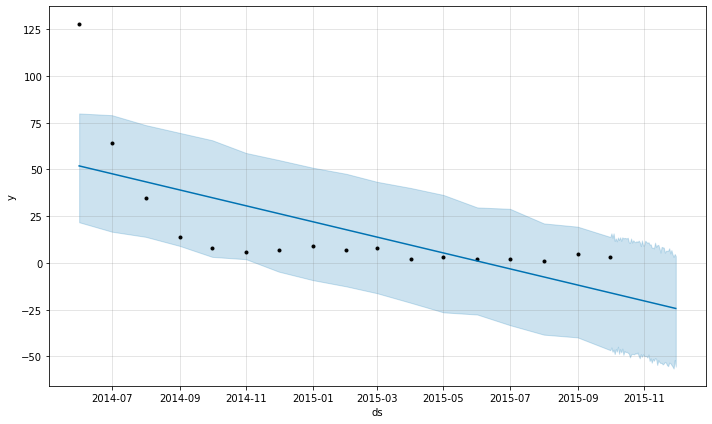

In [9]:
fig1 = m.plot(forecast)